# Project Overview 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


## Data

This data set comes from Kaggle and can be found here:

https://www.kaggle.com/tmdb/tmdb-movie-metadata/code 

## EDA 

- Which genres are most popular from year to year? 
- What genres of movie is most popular?
- What movies had the lowest and highest budget?
- What movie has the highest revenue? Average budget?
- Average run time of movies?

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import json
from datetime import datetime



# Import Data

In [2]:
# Import the data
movie_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
# Quick Inspection of data 
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [72]:
movie_df.shape

(1493, 17)

In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# Data Cleaning

- Identify nulls
- Identify duplicates 
- Identify nested data
- Identify data types are correct 
- Remove unneccary columns

In [5]:
movie_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
# drop NA values 
movie_df.dropna(axis=0, inplace=True)

In [7]:
# Duplicates
movie_df.duplicated().value_counts()

False    1493
dtype: int64

In [8]:
# Check data types 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 4801
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1493 non-null   int64  
 1   genres                1493 non-null   object 
 2   homepage              1493 non-null   object 
 3   id                    1493 non-null   int64  
 4   keywords              1493 non-null   object 
 5   original_language     1493 non-null   object 
 6   original_title        1493 non-null   object 
 7   overview              1493 non-null   object 
 8   popularity            1493 non-null   float64
 9   production_companies  1493 non-null   object 
 10  production_countries  1493 non-null   object 
 11  release_date          1493 non-null   object 
 12  revenue               1493 non-null   int64  
 13  runtime               1493 non-null   float64
 14  spoken_languages      1493 non-null   object 
 15  status               

- Data types are ok and can  be used to complete the analysis 

In [9]:
#  View data in columns: Understand the data
movie_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


----

# Nested Data 

In [10]:
# clean nested data: 

movie_df.genres.head(20)

0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
5     [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...
6     [{"id": 16, "name": "Animation"}, {"id": 10751...
7     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
8     [{"id": 12, "name": "Adventure"}, {"id": 14, "...
9     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
11    [{"id": 12, "name": "Adventure"}, {"id": 28, "...
12    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
13    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
14    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
16    [{"id": 878, "name": "Science Fiction"}, {"id"...
17    [{"id": 12, "name": "Adventure"}, {"id": 28, "...
18    [{"id": 28, "name": "Action"}, {"id": 35, "nam...
19    [{"id": 28, "name": "Action"}, {"id": 12, 

# Remove unneccessary columns


Based on what we want to analyze from the data set. We can eliminate unnecessary columns and focus on what data is needed. 

In [11]:
# We will not need to analyze id, overview or homepage for this analysis
movie_df.drop(columns=['id','overview','homepage', 'keywords'], inplace=True)

In [12]:
movie_df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [13]:
# Parse genre column
def parse_col_json(column,key):

    for index,i in zip(movie_df.index,movie_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))
        movie_df.loc[index,column]=str(list1)

In [14]:
parse_col_json('genres', 'name')


movie_df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


---------

# Data Analysis 


Now that the data is cleaned and prepared for analysis we can explore th following questions:

- Which genres are most popular from year to year?
- What genres of movie is most popular?
- What movies had the lowest and highest budget?
- What movie has the highest revenue?

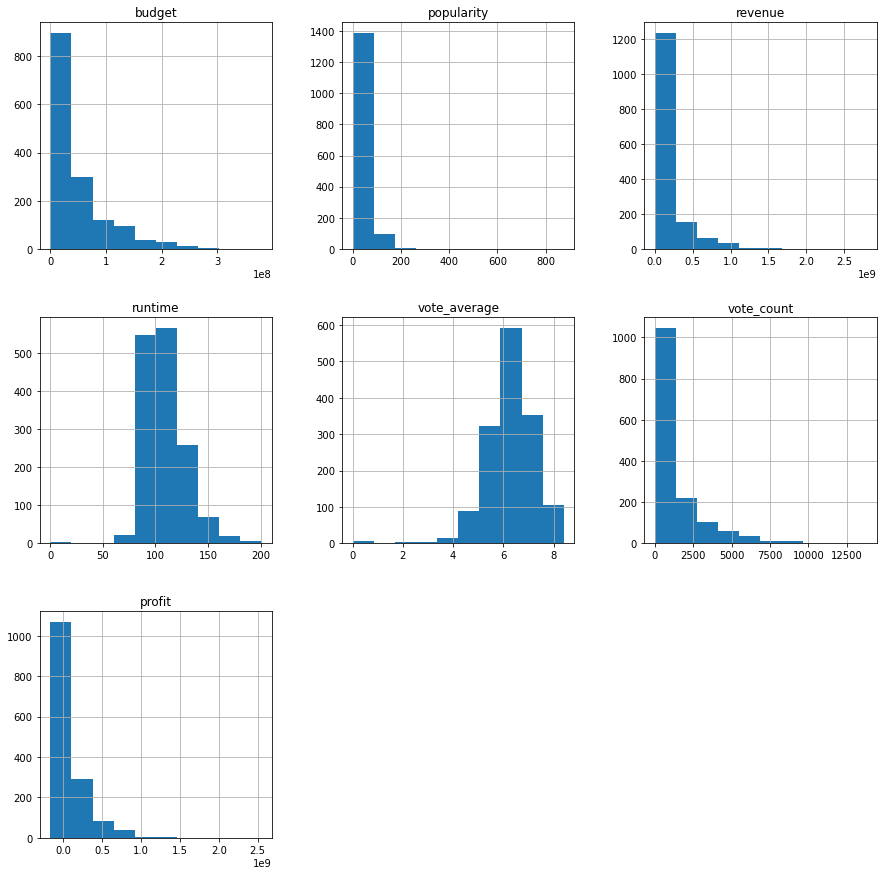

In [108]:
# Initial inspection
movie_df.hist(figsize=(15,15));

In [15]:
# Genre categories 
movie_df.genres.sort_values().unique()

array(["['Action', 'Adventure', 'Animation', 'Comedy', 'Family']",
       "['Action', 'Adventure', 'Animation', 'Family']",
       "['Action', 'Adventure', 'Comedy', 'Crime', 'Mystery', 'Thriller']",
       "['Action', 'Adventure', 'Comedy', 'Drama', 'Science Fiction', 'Thriller']",
       "['Action', 'Adventure', 'Comedy', 'Family']",
       "['Action', 'Adventure', 'Comedy', 'Fantasy']",
       "['Action', 'Adventure', 'Comedy', 'Science Fiction']",
       "['Action', 'Adventure', 'Comedy', 'Thriller']",
       "['Action', 'Adventure', 'Comedy']",
       "['Action', 'Adventure', 'Crime', 'Drama', 'Mystery', 'Thriller']",
       "['Action', 'Adventure', 'Crime', 'Fantasy', 'Science Fiction']",
       "['Action', 'Adventure', 'Crime', 'Mystery', 'Thriller']",
       "['Action', 'Adventure', 'Crime', 'Mystery']",
       "['Action', 'Adventure', 'Crime', 'Thriller']",
       "['Action', 'Adventure', 'Crime']",
       "['Action', 'Adventure', 'Drama', 'Mystery', 'Romance', 'Fantasy']",
  

In [16]:
# highest genres count
movie_df.genres.value_counts()

['Drama']                                                          91
['Comedy']                                                         74
['Drama', 'Romance']                                               47
['Comedy', 'Romance']                                              38
['Comedy', 'Drama']                                                32
                                                                   ..
['Romance', 'Fantasy', 'Family', 'Drama']                           1
['Science Fiction', 'Action', 'Adventure', 'Fantasy', 'Comedy']     1
['History', 'Documentary']                                          1
['Fantasy']                                                         1
['Comedy', 'Fantasy', 'Music']                                      1
Name: genres, Length: 555, dtype: int64

In [17]:
# Top 10 genres of movies 
movie_df.genres.value_counts().head(10)

['Drama']                              91
['Comedy']                             74
['Drama', 'Romance']                   47
['Comedy', 'Romance']                  38
['Comedy', 'Drama']                    32
['Comedy', 'Drama', 'Romance']         28
['Horror', 'Thriller']                 28
['Drama', 'Thriller']                  24
['Adventure', 'Action', 'Thriller']    23
['Horror']                             21
Name: genres, dtype: int64

In [18]:
movie_genres10 = movie_df.genres.value_counts().head(10)

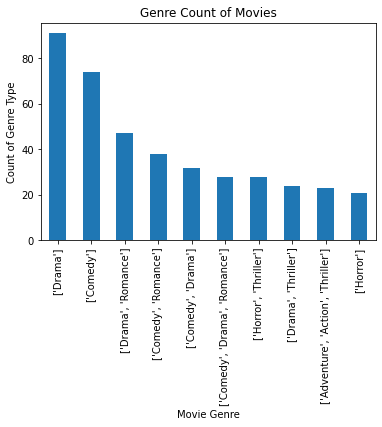

In [19]:
movie_genres10.plot.bar()
plt.xlabel('Movie Genre')
plt.ylabel('Count of Genre Type')
plt.title('Genre Count of Movies');

__Conclusion from Data__

Genres with the highest count: 
- 1st Drama 
- 2nd Comedy 
- 3rd Romamnce/Drama

Some genres can be a mix but from this data it shows Drama to be the highest count. 

In [20]:
# Highest earning: Revenue - budget 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 4801
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1493 non-null   int64  
 1   genres                1493 non-null   object 
 2   original_language     1493 non-null   object 
 3   original_title        1493 non-null   object 
 4   popularity            1493 non-null   float64
 5   production_companies  1493 non-null   object 
 6   production_countries  1493 non-null   object 
 7   release_date          1493 non-null   object 
 8   revenue               1493 non-null   int64  
 9   runtime               1493 non-null   float64
 10  spoken_languages      1493 non-null   object 
 11  status                1493 non-null   object 
 12  tagline               1493 non-null   object 
 13  title                 1493 non-null   object 
 14  vote_average          1493 non-null   float64
 15  vote_count           

In [21]:
#Part 1: highest revenue movies top 5

movie_df.revenue.sort_values(ascending = False).head(5)

0     2787965087
25    1845034188
16    1519557910
28    1513528810
44    1506249360
Name: revenue, dtype: int64

In [22]:
#Part 2: Highest budget movies top 5
movie_df.budget.sort_values(ascending = False).head(5)

17    380000000
1     300000000
7     280000000
4     260000000
6     260000000
Name: budget, dtype: int64

__Conclusion__

- Just because a movie has the higest revenue or highest budget does not mean it is the most profitable movie.


In [23]:
# Calculate profit 
movie_df["profit"] = movie_df["revenue"]- movie_df["budget"]
profit_top_5 = movie_df.sort_values(by='profit',ascending=False)
profit_top_5.profit.head(5)

0     2550965087
25    1645034188
28    1363528810
44    1316249360
16    1299557910
Name: profit, dtype: int64

In [24]:
# Locate movie titles with this higest profit 
movie_df.loc[movie_df.profit.sort_values(ascending=False).head().index]

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",en,Titanic,100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",en,Jurassic World,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,1363528810
44,190000000,['Action'],en,Furious 7,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",en,The Avengers,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,1299557910


# Linking Analysis - Genre and Profit 

- We know the top ranking genre is Drama, and we know the top ranking movies. Lets see if they have a correlation. 

Question:
- Do the most profitable movies fall into the Drama genres? 

In [41]:
movie_df["profit"] = movie_df["revenue"]- movie_df["budget"]
profit_top_5 = movie_df.sort_values(by='profit',ascending=False)
profit_top_5.genres.head(5)

0     ['Action', 'Adventure', 'Fantasy', 'Science Fi...
25                     ['Drama', 'Romance', 'Thriller']
28    ['Action', 'Adventure', 'Science Fiction', 'Th...
44                                           ['Action']
16           ['Science Fiction', 'Action', 'Adventure']
Name: genres, dtype: object

__Conclusion From Data__

- Out of the top 5 movies only 1 movie has a sub category of drama. Highest genre count does not mean higher profitability. 

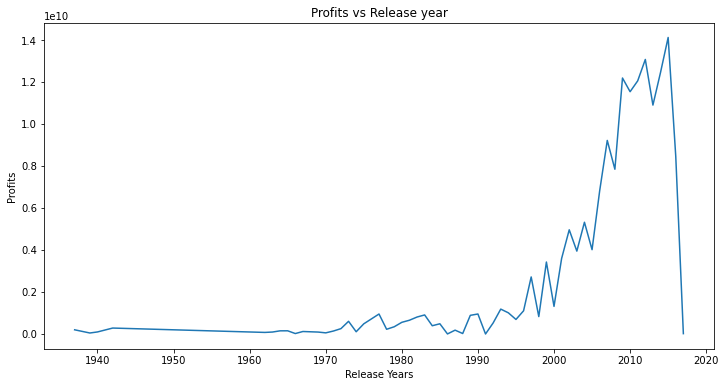

In [128]:
# Linking Analysis: Profit and Release year 

profits_by_release = movie_df.groupby("release_year")["profit"].sum()
plt.figure(figsize=(12,6))
plt.plot(profits_by_release)
plt.xlabel("Release Years")
plt.ylabel("Profits")
plt.title("Profits vs Release year")
plt.show()

__Conclusion From Data__

- From 1940 to 1970 a steady trend 
- From 1980 to 2018 an upward trend (very frequent releases compared to 1940 to 1970)

------------

In [26]:
#What Movies had the highest budget and where does it rank?

# Highest
movie_df.loc[movie_df.budget.sort_values(ascending=False).head().index]

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
17,380000000,"['Adventure', 'Action', 'Fantasy']",en,Pirates of the Caribbean: On Stranger Tides,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-05-14,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,665713802
1,300000000,"['Adventure', 'Fantasy', 'Action']",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
7,280000000,"['Action', 'Adventure', 'Science Fiction']",en,Avengers: Age of Ultron,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,1125403694
4,260000000,"['Action', 'Adventure', 'Science Fiction']",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100
6,260000000,"['Animation', 'Family']",en,Tangled,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,331794936


In [117]:
#Average movie budget 
movie_df.budget.mean()

45895338.38981915

In [116]:
# average run time
movie_df.runtime.mean()

108.65773610180844

--------